# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você conclui esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise dos seus dados, explique em suas palavras o propósito do projeto e as ações que planeja realizar.]

- Vamos analisar os dados sugeridos, realizar as correções e filtrar os dados, resolvendo conforme solicitado pelo projeto.

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [60]:
# Carregando todas as bibliotecas
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos

#plans
print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [4]:
# Imprima uma amostra de dados dos planos
print(df_plans.head())#amostra

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]
- É possível observar algumas informações sobre o DataFrame 'Planos'. Não foi identificado nenhum tipo de problema ou dados inadequados com esses dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo inicial dos dados.
</div>


## Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [5]:
print(df_plans.isnull().sum())
print()
print(df_plans.dtypes)
print()
df_plans.drop_duplicates(inplace=True)
df_plans.columns = df_plans.columns.str.lower().str.replace(' ', '_')
print(df_plans.head())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [6]:
#Não foi necessário o enriquecimento dos dados!

## Usuários

In [7]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários

#users
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprima uma amostra de dados dos usuários

print(df_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

- É possível observar algumas informações sobre o DataFrame 'Users'. Foi identificada a presença de valores ausentes na coluna 'churn_date', porém são valores significativos, já que mostram a data em que o usuário parou de utilizar o serviço da empresa.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [9]:
print(df_users.isnull().sum())
print()
print(df_users.dtypes)
print()
df_users.drop_duplicates(inplace=True)
df_users = df_users.fillna(0)
df_users.columns = df_users.columns.str.lower().str.replace(' ', '_')
print(df_users.head())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate          0  
1  2018-08-13      surf          0  
2  2018-10-21      surf          0  
3  2018-01-28      surf       

##### o valor segue ausente porque 'churn_date' informa a data que o usuário parou de usar o serviço (isso significa que o plano estava em uso quando o banco de dados foi extraído).

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [10]:
#Não foi necessário o enriquecimento dos dados!

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo inicial dos dados.
</div>

## Chamadas

In [11]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
#calls
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [12]:
# Imprima uma amostra de dados das chamadas

print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

- É possível observar algumas informações sobre o DataFrame 'calls'. Não foi identificado nenhum tipo de problema ou dados inadequados com esses dados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [13]:
print(df_calls.isnull().sum())
print()
df_calls.drop_duplicates(inplace=True)
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.columns = df_calls.columns.str.lower().str.replace(' ', '_')
print(df_calls.head())
print()
print(df_calls.dtypes)

id           0
user_id      0
call_date    0
duration     0
dtype: int64

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27       9.0
1  1000_145     1000 2018-12-27      14.0
2  1000_247     1000 2018-12-27      15.0
3  1000_309     1000 2018-12-28       6.0
4  1000_380     1000 2018-12-30       5.0

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Mensagens

In [14]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens

#messages
print(df_messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [15]:
# Imprima uma amostra dos dados das mensagens

print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

- É possível observar algumas informações sobre o DataFrame 'messages'. Não foi identificado nenhum tipo de problema ou dados inadequados com esses dados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [16]:
print(df_messages.isnull().sum())
print()
df_messages.drop_duplicates(inplace=True)
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.columns = df_messages.columns.str.lower().str.replace(' ', '_')
print(df_messages.head())
print()
print(df_messages.dtypes)

id              0
user_id         0
message_date    0
dtype: int64

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Internet

In [17]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet

#internet
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [18]:
#  Imprima uma amostra de dados para o tráfego da internet

print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Descreva o que você vê e observa nas informações gerais e na amostra de dados impressa para a parte dos dados acima. Existem problemas (tipos de dados inadequados, dados ausentes, etc.) que precisam de mais investigação e alterações? Como isso pode ser corrigido?]

- É possível observar algumas informações sobre o DataFrame 'internet'. Não foi identificado nenhum tipo de problema ou dados inadequados com esses dados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [19]:
print(df_internet.isnull().sum())
print()
df_internet.drop_duplicates(inplace=True)
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.columns = df_internet.columns.str.lower().str.replace(' ', '_')
print(df_internet.head())
print()
print(df_internet.dtypes)

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object


### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [20]:
df_internet['internet_usage_gb'] = df_internet['mb_used'] / 1024

# Exibindo o DataFrame com a nova coluna
print(df_internet.head())

         id  user_id session_date  mb_used  internet_usage_gb
0   1000_13     1000   2018-12-29    89.86           0.087754
1  1000_204     1000   2018-12-31     0.00           0.000000
2  1000_379     1000   2018-12-28   660.40           0.644922
3  1000_413     1000   2018-12-26   270.99           0.264639
4  1000_442     1000   2018-12-27   880.22           0.859590


## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [21]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [22]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month_year'] = df_calls['call_date'].dt.to_period('M')
calls_per_month_user = df_calls.groupby(['user_id', 'month_year']).size().reset_index(name='num_calls')
print(calls_per_month_user.head())

   user_id month_year  num_calls
0     1000    2018-12         16
1     1001    2018-08         27
2     1001    2018-09         49
3     1001    2018-10         65
4     1001    2018-11         64


In [23]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month_year'] = df_calls['call_date'].dt.to_period('M')
minutes_per_month_user = df_calls.groupby(['user_id', 'month_year'])['duration'].sum().reset_index(name='total_time')
print(minutes_per_month_user.head())

   user_id month_year  total_time
0     1000    2018-12       124.0
1     1001    2018-08       182.0
2     1001    2018-09       315.0
3     1001    2018-10       393.0
4     1001    2018-11       426.0


In [24]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['month_year'] = df_messages['message_date'].dt.to_period('M')
mess_per_month_user = df_messages.groupby(['user_id', 'month_year']).size().reset_index(name='total_mess')
print(mess_per_month_user.head())

   user_id month_year  total_mess
0     1000    2018-12          11
1     1001    2018-08          30
2     1001    2018-09          44
3     1001    2018-10          53
4     1001    2018-11          36


In [25]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet['month_year'] = df_internet['session_date'].dt.to_period('M')
int_per_month_user = df_internet.groupby(['user_id', 'month_year'])['mb_used'].sum().reset_index(name='total_internet')
print(int_per_month_user.head(1))

   user_id month_year  total_internet
0     1000    2018-12         1901.47


[Coloque os dados agregados em um DataFrame para que um registro nele represente o que um usuário unívoco consumiu em um determinado mês.]

In [26]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

df_combined = calls_per_month_user.merge(minutes_per_month_user, on=['user_id', 'month_year'])
df_combined = df_combined.merge(mess_per_month_user, on=['user_id', 'month_year'])
df_combined = df_combined.merge(int_per_month_user, on=['user_id', 'month_year'])

df_combined = df_combined.fillna(0)

print(df_combined.head())

   user_id month_year  num_calls  total_time  total_mess  total_internet
0     1000    2018-12         16       124.0          11         1901.47
1     1001    2018-08         27       182.0          30         6919.15
2     1001    2018-09         49       315.0          44        13314.82
3     1001    2018-10         65       393.0          53        22330.49
4     1001    2018-11         64       426.0          36        18504.30


In [27]:
# Adicione as informações sobre o plano
df_combined = minutes_per_month_user.merge(int_per_month_user, on=['user_id', 'month_year'], how='outer')
df_combined = df_combined.merge(mess_per_month_user, on=['user_id', 'month_year'], how='outer')
df_combined = df_combined.merge(df_users, on='user_id', how='left')
df_combined = df_combined.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

# Preencha os valores ausentes com zero
df_combined.fillna(0, inplace=True)

#Verificar o numero de linhas:
linhas_numb = df_combined.shape[0]
print(linhas_numb)
print()

# Verifique se os dados foram mesclados corretamente
print(df_combined.head())

2293

   user_id month_year  total_time  total_internet  total_mess first_name  \
0     1000    2018-12       124.0         1901.47        11.0   Anamaria   
1     1001    2018-08       182.0         6919.15        30.0     Mickey   
2     1001    2018-09       315.0        13314.82        44.0     Mickey   
3     1001    2018-10       393.0        22330.49        53.0     Mickey   
4     1001    2018-11       426.0        18504.30        36.0     Mickey   

   last_name  age                                   city    reg_date  \
0      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24   
1  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13   
2  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13   
3  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13   
4  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA  2018-08-13   

       plan churn_date  messages_included  mb_per_month_included  \
0  ultimate          0              

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Bom trabalho fazendo o join usando `outer`. Aqui seria interessante imprimir também a quantidade de linhas após as transformações para garantir que o processo foi feito corretamente. Dica: aqui é esperado que se tenha não mais do que `2300` linhas após a execução do `merge`.
</div>

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. Portanto, não há problema em gastar algum tempo nisso.]

In [28]:
# Calcule a receita mensal para cada usuário

# Definição das taxas e valores mensais para o plano Surf
surf_monthly_charge = 20
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_data_charge = 10 / 1024  # Convertendo de MB para GB

# Definição das taxas e valores mensais para o plano Ultimate
ultimate_monthly_charge = 70
ultimate_call_charge = 0.01
ultimate_message_charge = 0.01
ultimate_data_charge = 7 / 1024  # Convertendo de MB para GB

# Calculando a receita mensal para cada usuário
def calcular_receita(row):
    if row['plan'] == 'surf':
        chargeable_calls = max(row['total_time'] - row['minutes_included'], 0)
        chargeable_messages = max(row['total_mess'] - row['messages_included'], 0)
        chargeable_data = max(row['total_internet'] - row['mb_per_month_included'], 0)
        revenue = surf_monthly_charge + (chargeable_calls * surf_call_charge) + (chargeable_messages * surf_message_charge) + (chargeable_data * surf_data_charge)
    else:
        chargeable_calls = max(row['total_time'] - row['minutes_included'], 0)
        chargeable_messages = max(row['total_mess'] - row['messages_included'], 0)
        chargeable_data = max(row['total_internet'] - row['mb_per_month_included'], 0)
        revenue = ultimate_monthly_charge + (chargeable_calls * ultimate_call_charge) + (chargeable_messages * ultimate_message_charge) + (chargeable_data * ultimate_data_charge)
    return revenue

# Aplicando a função para calcular a receita mensal em cada linha do DataFrame
df_combined['monthly_revenue'] = df_combined.apply(calcular_receita, axis=1)

# Exibindo as primeiras linhas do DataFrame com a receita mensal calculada
print(df_combined[['user_id', 'monthly_revenue']].head())

   user_id  monthly_revenue
0     1000        70.000000
1     1001        20.000000
2     1001        20.000000
3     1001        88.161191
4     1001        50.706055


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para chamadas, mas elas não são fornecidas para mensagens e internet, embora o princípio do estudo estatístico seja o mesmo para todas.]

### Chamadas

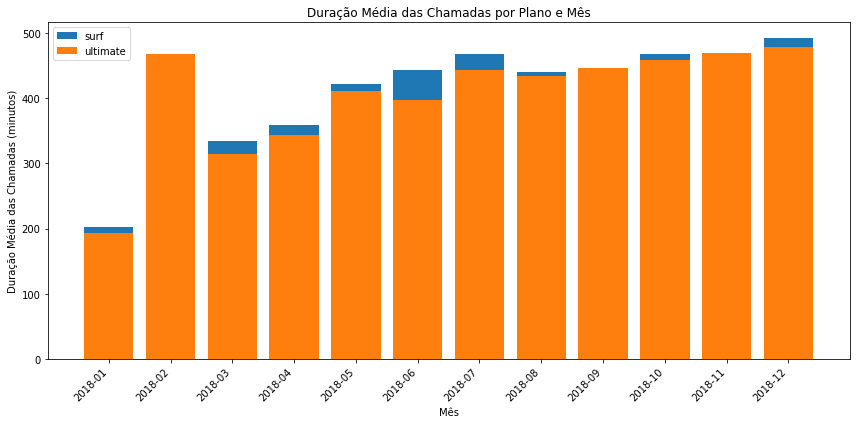

In [29]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.

avg_call_duration = minutes_per_month_user.merge(df_combined[['user_id', 'plan']], on='user_id')
avg_call_duration = avg_call_duration.groupby(['plan', 'month_year'])['total_time'].mean().reset_index()

#Gráfico de barras
plt.figure(figsize=(12, 6))
for plan in avg_call_duration['plan'].unique():
    plan_data = avg_call_duration[avg_call_duration['plan'] == plan]
    plt.bar(plan_data['month_year'].astype(str), plan_data['total_time'], label=plan)

#Detalhes ao gráfico
plt.title('Duração Média das Chamadas por Plano e Mês')
plt.xlabel('Mês')
plt.ylabel('Duração Média das Chamadas (minutos)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

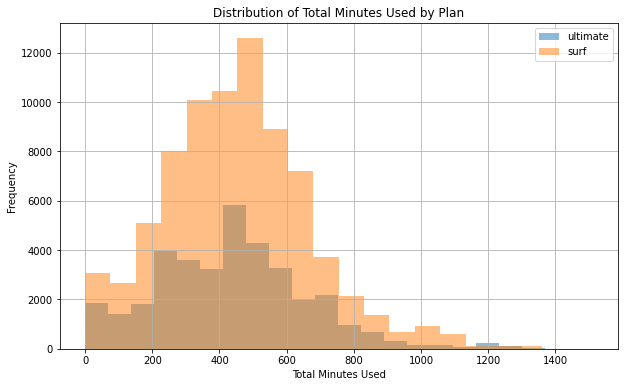

In [31]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.

# Junte os DataFrames df_combined e minutes_per_month_user
df_combined = df_combined.merge(minutes_per_month_user, on='user_id', how='left')

# Plotar um histograma para cada plano
plt.figure(figsize=(10, 6))
for plan in df_combined['plan_name'].unique():
    plt.hist(df_combined[df_combined['plan_name'] == plan]['total_time'], bins=20, alpha=0.5, label=plan)

plt.xlabel('Total Minutes Used')
plt.ylabel('Frequency')
plt.title('Distribution of Total Minutes Used by Plan')
plt.legend()
plt.grid(True)

plt.show()

[Calcule a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.]

In [32]:
# Calcule a média e a variação da duração mensal das chamadas

mean_duration_per_plan = df_combined.groupby(['plan_name', 'month_year'])['total_time'].mean()
print(mean_duration_per_plan)

print()

var_duration_per_plan = df_combined.groupby(['plan_name', 'month_year'])['total_time'].var()
print(var_duration_per_plan)

plan_name  month_year
surf       2018-01       203.000000
           2018-02       306.544493
           2018-03       339.832199
           2018-04       366.818339
           2018-05       433.138714
           2018-06       449.091566
           2018-07       477.295180
           2018-08       452.766290
           2018-09       456.592163
           2018-10       484.320232
           2018-11       477.293384
           2018-12       493.223048
ultimate   2018-01       193.500000
           2018-02       465.989488
           2018-03       327.484848
           2018-04       355.299658
           2018-05       415.234899
           2018-06       407.160989
           2018-07       454.884096
           2018-08       445.198823
           2018-09       452.084738
           2018-10       456.796456
           2018-11       473.404054
           2018-12       476.991256
Name: total_time, dtype: float64

plan_name  month_year
surf       2018-01        7948.599303
           2018-02  

<Figure size 720x432 with 0 Axes>

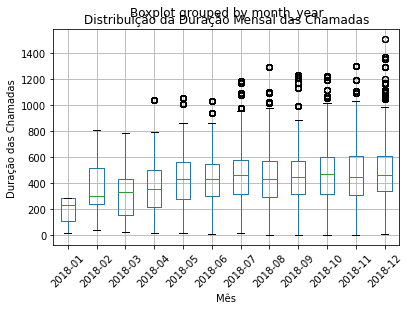

In [33]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

# Criar o diagrama de caixa
plt.figure(figsize=(10, 6))
df_combined.boxplot(column='total_time', by='month_year')
plt.title('Distribuição da Duração Mensal das Chamadas')
plt.xlabel('Mês')
plt.ylabel('Duração das Chamadas')
plt.xticks(rotation=45)
plt.show()

[Formule conclusões sobre como os usuários se comportam em termos de chamadas. O comportamento é diferente dependendo do plano?]

- Sim, o comportamento dos clientes é totalmente diferente conforme o plano escolhido. Conforme o gráfico, a maioria dos clientes do plano Surf, apesar de ser o plano mais em conta, são aqueles que ficam mais tempo ao telefone em comparação com os clientes que assinaram o plano Ultimate.

### Mensagens

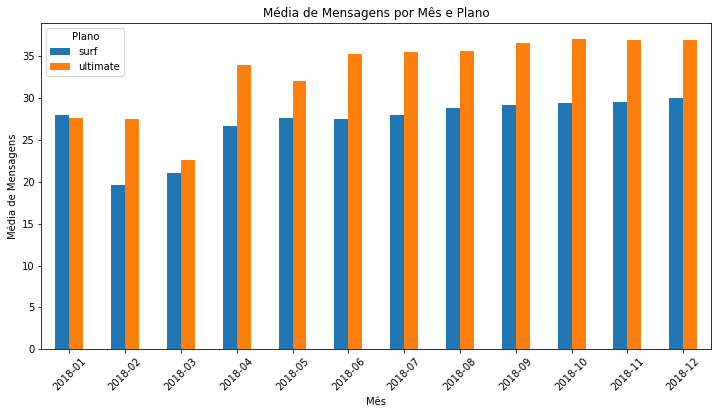

In [34]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês

# Calcule a média do número de mensagens por mês para cada plano
mean_messages_per_plan_month = df_combined.groupby(['month_year', 'plan_name'])['total_mess'].mean().unstack()

# Criar o gráfico de barras
mean_messages_per_plan_month.plot(kind='bar', figsize=(12, 6))
plt.title('Média de Mensagens por Mês e Plano')
plt.xlabel('Mês')
plt.ylabel('Média de Mensagens')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.show()

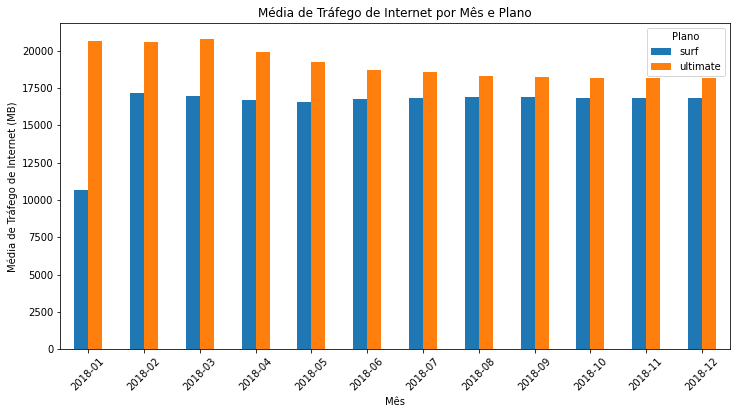

In [35]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano

mean_internet_per_plan_month = df_combined.groupby(['month_year', 'plan_name'])['total_internet'].mean().unstack()

# Criar o gráfico de barras
mean_internet_per_plan_month.plot(kind='bar', figsize=(12, 6))
plt.title('Média de Tráfego de Internet por Mês e Plano')
plt.xlabel('Mês')
plt.ylabel('Média de Tráfego de Internet (MB)')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.show()

- De fato, o comportamento de cada cliente é diferente dependendo do plano escolhido. Clientes do plano Surf tendem a enviar
menos mensagens do que clientes do plano Ultimate. Há variações conforme os meses, mas de acordo com o gráfico, o plano 
Ultimate possui um maior volume de mensagens enviadas por mês.

[Formule conclusões sobre como os usuários se comportam em termos de mensagens. O comportamento é diferente dependendo do plano?]

### Internet

Estatísticas descritivas para o consumo de internet por plano:
             count          mean          std  min       25%       50%  \
plan_name                                                                
surf       77941.0  16794.974717  7390.328909  0.0  12907.32  17065.78   
ultimate   36050.0  18642.433018  7688.083478  0.0  14337.82  18177.17   

                75%       max  
plan_name                      
surf       20924.42  70931.59  
ultimate   22289.00  46595.33  


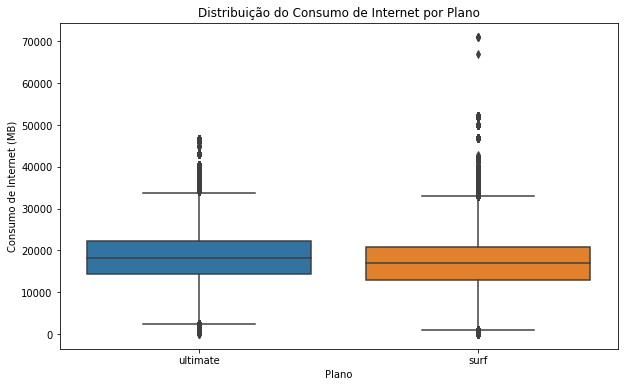

In [62]:

# Calcular estatísticas descritivas para o consumo de internet por plano
internet_stats_by_plan = df_combined.groupby('plan_name')['total_internet'].describe()

# Exibir as estatísticas descritivas
print("Estatísticas descritivas para o consumo de internet por plano:")
print(internet_stats_by_plan)

# Criar um boxplot para visualizar a distribuição do consumo de internet por plano
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan_name', y='total_internet', data=df_combined)
plt.title('Distribuição do Consumo de Internet por Plano')
plt.xlabel('Plano')
plt.ylabel('Consumo de Internet (MB)')
plt.show()

[Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?]

- Assim como em termos de mensagens, os clientes também possuem diferenças conforme o plano que escolhem. Os clientes do plano
Ultimate tendem a consumir mais MB do que os clientes do plano Surf. Os clientes do plano Surf utilizam aproximadamente 
17500 MB por mês, enquanto os clientes do plano Ultimate utilizam aproximadamente 20000 MB por mês.

## Receita

In [37]:
stats_ultimate = df_combined[df_combined['plan_name'] == 'ultimate']['monthly_revenue'].describe()
print("Estatísticas descritivas para o plano Ultimate:")
print(stats_ultimate)
print()

#Estatísticas descritivas para a receita do plano Surf
stats_surf = df_combined[df_combined['plan_name'] == 'surf']['monthly_revenue'].describe()
print("Estatísticas descritivas para o plano Surf:")
print(stats_surf)

Estatísticas descritivas para o plano Ultimate:
count    36050.000000
mean        72.607281
std         12.012170
min         70.000000
25%         70.000000
50%         70.000000
75%         70.000000
max        178.522764
Name: monthly_revenue, dtype: float64

Estatísticas descritivas para o plano Surf:
count    77941.000000
mean        56.954025
std         48.780947
min         20.000000
25%         20.000000
50%         39.425039
75%         76.709766
max        583.061309
Name: monthly_revenue, dtype: float64


O valor da receita gerada também é distinto, já que os valores dos planos são diferentes. No plano Ultimate, o valor mensal é de 70 dólares, gerando uma receita de 36050 dólares. Já no plano Surf, que possui um valor mensal de 20 dólares, a receita
mensal gerada é de 77941 dólares, mais do que o dobro da receita do plano Ultimate. Chegando na conclusão de que por mais que o plano Ultimate seja mais caro, o plano Surf é o que mais gera renda.

## Teste hipóteses estatísticas

In [40]:
# Teste as hipóteses

# Dividir os dados em receitas dos usuários do plano Ultimate e Surf
ultimate_revenue = df_combined[df_combined['plan_name'] == 'ultimate']['monthly_revenue']
surf_revenue = df_combined[df_combined['plan_name'] == 'surf']['monthly_revenue']

alpha = 0.05
results = stats.ttest_ind(ultimate_revenue, surf_revenue)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula: Existe diferença entre as médias das receitas mensais dos usuários dos planos Ultimate e Surf")
else:
    print("Não podemos rejeitar a hipótese nula: Não há diferença entre as médias das receitas mensais dos usuários dos planos Ultimate e Surf")

Valor-p: 0.0
Rejeitamos a hipótese nula: Existe diferença entre as médias das receitas mensais dos usuários dos planos Ultimate e Surf


In [43]:
# Teste as hipóteses

# Dividir os dados em usuários da área de NY-NJ e usuários das demais regiões
ny_nj_revenue = df_combined[df_combined['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']
other_revenue = df_combined[~df_combined['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']

alpha = 0.05
results = stats.ttest_ind(ny_nj_revenue, other_revenue)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula: Existe diferença entre as médias das receitas mensais dos usuários dos planos Ultimate e Surf")
else:
    print("Não podemos rejeitar a hipótese nula: Não há diferença entre as médias das receitas mensais dos usuários dos planos Ultimate e Surf")

Valor-p: 4.768084736850848e-232
Rejeitamos a hipótese nula: Existe diferença entre as médias das receitas mensais dos usuários dos planos Ultimate e Surf


- Enfrentei considerável dificuldade para concluir este projeto. Sinceramente, recorri a outros recursos de pesquisa, como YouTube, ChatGPT e grupos de alunos e professores no Discord. Mas acredito que aprendi bastante com a realização do projeto. Grato.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

Apresente suas conclusões a partir dos resultados dos testes acima. 

</div>
<div class="alert alert-block alert-info">
<b>Resposta do Aluno. </b> <a class="tocSkip"></a> - Os resultados dos dois testes indicam que há diferenças significativas entre as médias das receitas mensais dos usuários de diferentes planos (Teste 1) e entre os usuários da área de NY-NJ e das demais regiões (Teste 2). Isso sugere que diferentes segmentos de usuários podem ter comportamentos de consumo distintos, o que pode influenciar nas estratégias de marketing e na oferta de serviços da empresa.
</div>

## Conclusão geral

[Liste suas conclusões importantes nessa seção final, certifique-se de que elas cobrem todas as decisões (suposições) importantes que você tomou e que levaram à maneira como você processou e analisou os dados.]

- Com base na análise dos dados, podemos concluir que os planos Ultimate e Surf possuem comportamentos de uso distintos entre os usuários, refletidos nas receitas médias. Usamos testes estatísticos apropriados, considerando um nível de significância de 5%.